### Introduction to logistic regression

Linear Regression is just the base that we build on. Real world problems often require more sophisticated non-linear models.

They may be:
. Quadratic
. Exponential
. Logistic  

A Logistic regression implies that the possible outcomes are not numerical but rather categorical. This can be either a yes or no response just like dummies which is often the case in a business situation.

With a logistic regression, we can make a much more fundamental forecast - will the customer buy at all! 

### A simple example in Python

#### Basics of Logistic regression

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the data
raw_data = pd.read_csv('C:\\Users\\AFC 2\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\2.01. Admittance.csv')

In [3]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
# Like dummies, we must convert the yes and nos entries to 1s and 0s to be able to use as quantitative analysis  
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


#### Variables

In [5]:
y = data['Admitted'] 
x1 = data['SAT']

#### Let's plot the data

### Scatter plot

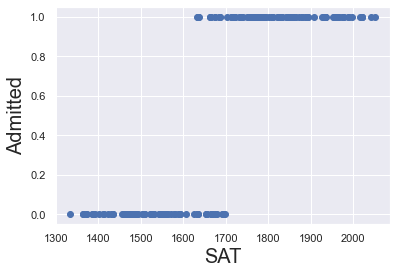

In [6]:
plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

In the scatter plot above, you will see that for all the observations below, the outcome was 0 (not admitted). While the observations above are 1 (got admitted)

#### Plot with regression line

C:\Users\AFC 2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


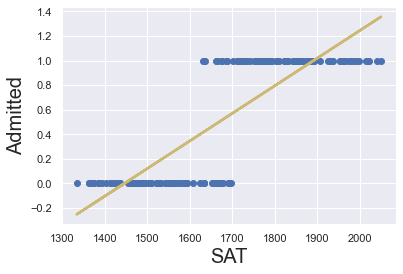

In [7]:
x = sn.add_constant(x1)
reg_lin = sn.OLS(y, x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1, y_hat, lw = 2.5, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

This regression doesn't even know that our values are bounded between 0 and 1 which is pretty dumb

Linear regression is a great technique but simply not fit for this kind of analysis which violates the assumption of the OLS on linearity.  Thus, we must use non-linear approaches.

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


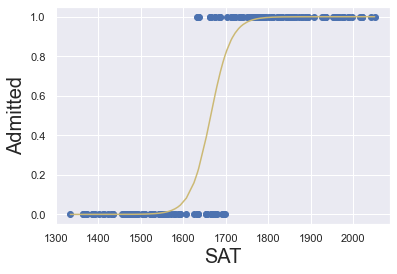

In [8]:
# what an appropriate regression line look like - useing the Logit function
# it uses the logit 2 function to get a S-shaped(sigmoid)
reg_log = sn.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()

This function shows the probability of admission given an SAT score.
When the SAT score is relatively high, the probability of getting admitted is 1
A score between 1600 and 1750 is uncertain

### Logistic vs logit function

Logistic Regression Assumptions
1. Linearity
2. No endogeneity
3. Normality and Homoscedasticity
4. No autocorrelation
5. No multicollinearity

Logistic regression are non-linear

#### Logistic regression
This predicts the probability of an event occuring. It is defined by a logistic function. It is S-shaped. Input => Probability

##### Explaining Odds: 

1. There are 2 probabilities when you throw a fair coin - Head or Tail => 50%

The odds of getting heads = p(heads)/p(tails) = 50%/50% = 1/1

2. Odds of getting a 6 in tossing a coin = p(getting)/p(not getting) = 1/6/5/6 = 1:5

#### Logit Model

It is much easier to use the logit form. 

### Building a logistic regression

#### Basics of logistics regression

#### Import the relevant libraries as above

In [9]:
# Load the data
raw_data = pd.read_csv('C:\\Users\\AFC 2\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\2.01. Admittance.csv')

In [10]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


#### Declare the dependent and independent variables

In [11]:
y = data['Admitted'] 
x1 = data['SAT']

#### Regression

In [12]:
# Here, we add a constant
x = sn.add_constant(x1)

# we will now declare the regression in 2 steps
reg_log = sn.Logit(y,x) # this replaces the OLS in linear regression

# next we will fit the regression by declaring a new variable
results_log = reg_log.fit() #results log

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\AFC 2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The message refers to the idea that statsmodel uses a machine learning algorithm to fit the regression. In statsmodel, the max number of iteration is 35 after which it stops trying.

### An invaluable coding tip

#### Summary:

The logistic regression summary and the linear regression summary are very much alike.

In [13]:
results_log.summary() # No error?

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.7992
Time:                        20:23:04   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As statsmodel is based on scipy and both are open source, problems arise from time to time (see discussion on github)

In some situations, copy the error message and google it.

There are two take aways from this lecture:
1. Open-source projects like Python and its libraries are not immaculate. Some functionalities can just stop working in the next update.
2. Work arounds are out there waiting for you to find them. The internet is a big enough space for problems and solutions.

### Understanding the tables

##### Maximum likelihood estimation(MLE) 

Likelihood function: This a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables - the bigger the likelihood function, the higher the probability that our model is correct.

MLE tries to maximize the likelihood function. The computer is going through different values until it finds a model for which the likelihood is the highest. When it can no longer improve, it will just stop the optimization.

##### Log likelihood

It is the more popular metric. The value of the Log-likelihood is almost but not always negative and the bigger it is, the better.

##### LL-Null (Log likelihood-null)

The log-likehood of a model which has no independent variables. It helps to see the loopholes in our model. It is seen as useless

In [14]:
x0 = np.ones(168)
reg_log = sn.Logit(y, x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:               7.410e-11
Time:                        20:23:04   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

You may want to compare the log-likelihood of your model with the LL-null to see if it your model has any explanatory power.

##### LLR(Log likelihood ratio)

It is based on the log-likelihood of the model and the LL-null. It measures if our model is statistically differnet from the LL-null a.k.a. a useless model

##### Pseudo R-squared

McFadden's R-squared: According to him, a good Pseudo R-squared is somewhere between 0.2 and 0.4. 
It is mostly useful for comparing the variations of the same model.
Different models will have a completely different and incomparable Pseudo R-squares.

##### Coefficients

Logit model: SAT - Admittance regression




#### Binary predictors in a logistic regression

In the same way we create dummies for linear regression, we can use binary predictors in a logistics regression.

In [15]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#### Load the data

In [16]:
raw_data = pd.read_csv('C:\\Users\\AFC 2\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [17]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


#### Declare the dependent and independent variables

In [18]:
y = data['Admitted']
x1 = data['Gender']

#### Regression

In [19]:
x = sn.add_constant(x1)
reg_log = sn.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


C:\Users\AFC 2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.1659
Time:                        20:23:04   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

The model is significant(p-value:6.283) as well as the gender variable. SAT was an outstanding predictor

In [20]:
np.exp(2.0786)

7.993270498536442

We know that there was a strong relationship between the SAT score and admittance. We will now create a new regression including both predictors.

#### Declare the dependent and independent variables using the SAT and Admittance

In [21]:
y = data['Admitted']
x1 = data[['SAT', 'Gender']]

In [22]:
x = sn.add_constant(x1)
reg_log = sn.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


C:\Users\AFC 2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.8249
Time:                        20:23:04   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

What we get is a regression with much higher Log-Likelihood(a better one).

In [23]:
#New coefficient of Gender
np.exp(1.9449)

6.992932526814459

Interpretation: Given the same SAT score, a female is 7 times more likely to be admitted than a male. In this university, it is much easier for females to be admitted. It is a common situation in the real world.

#### Calculating the accuracy of the model

### Accuracy

In [24]:
results_log.predict()

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [25]:
#Applying some formatting to make it more legible
np.set_printoptions(formatter = {'float': lambda x: '{0:0.2f}'.format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

These are the Predicted values by the model.

The 0 and 1 are the probabilities. Values below 0.5 means a less than 50% chance of admission. Above 0.5 will be rounded up.

In [26]:
#comparing the observed values with those of the model
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

These are the actual values.

If 80% of the predicted values coincide with the actual values, we say the model has 80% accuracy.

In [27]:
#Summarizing in a table using pred_table
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [28]:
#formatting the table
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


This produces a Confusion Matrix. It is called confusion because it shows how confused our model is.

Interpretation:

For 69 observations, the model predicted 0 when the true value was 0

For 90 observations, the model predicted 1 when the true value was 1. 

This implies that the model did its job well with these 2 observations.

However,

For 4 observations, the model predicted 0 while the true value was 1

For 5 observations, the model predicted 1 when the true value was 0

Here, the model got confused.

In 69 + 90 of the cases, the model was correct.
In 4 + 5 of the cases, the model was incorrect.
Overall, the model made an accurate prediction in 159 out of 168 cases.
159/168 = 0.946 = 94.6% accuracy

Our model seems good in classifying

In [29]:
#To calculate the accuracy
cm = np.array(cm_df)
accuracy_train = (cm[0, 0] + cm[1, 1]) / cm.sum()
accuracy_train

0.9464285714285714

### The concept of overfitting

#### Overfitting: 

- Our training has focused on the particular training set so much, it has 'missed the point'. - The random noise is captured inside an overfitted model.

#### Underfitting: 

- The model has not captured the underlying logic of the data. 
- It doesnt know what to do and therefore provides an answer that is incorrect. 
- It doesnt have a strong predictive power.
- They are clumsy and has low accuracy.  

A good model would not be perfect, but would be very close to the actual relationship.

Difference between an Underfitted model, a good model and an overfitted model.

An Underfitted model:
- Doesnt capture any logic
- Has low train accuracy

A good model:
- Captures the underlying logic of the dataset
- High train accuracy

An Overfitted model:
- Captures all the noise, thus 'mised the point'
- High train accuracy

Solution: Split the initial dataset into two - training and test.90/10 or 80/20 respectively

### Testing the model

Testing is done on a dataset the model has never seen before.

#### Testing the model and accessing its accuracy

In [30]:
import pandas as pd
#Load the dataset
test = pd.read_csv('C:\\Users\\AFC 2\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


The test_data and the raw_data were  a part of the same file but were secretly split. the spilt was 90/10.

In [31]:
#Map the categorical variables

test['Admitted'] = test['Admitted'].map({'Yes':1, 'N0':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test

,SAT,Admitted,Gender
0,1323,NaN,0
1,1725,1.0,1
2,1762,1.0,1
3,1777,1.0,0
4,1665,NaN,0
5,1556,1.0,1
6,1731,1.0,1
7,1809,1.0,1
8,1930,1.0,1
9,1708,1.0,0


In [32]:
#To predict the values
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


Note that order is very important because the coefficients of the regression will expect it. If not, the prediction will be wrong.

In [33]:
#Create a new variable
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis = 1)
test_data = sn.add_constant(test_data)
test_data

C:\Users\AFC 2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [34]:
#create the confusion matrix. Unfortunately, statsmodel does not provide this functionality.
#Manually create one

def confusion_matrix(data, actual_values, model):
    
    pred_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
    return cm, accuracy

In [35]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[0.00, 0.00],
        [1.00, 12.00]]),
 0.9230769230769231)

Almost, always, the training accuracy is higher than the testing accuracy. This is because of the overfitting

In [36]:
#Format the confusion matrix
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Prediction 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_df 

,Predicted 0,Prediction 1
Actual 0,0.0,0.0
Actual 1,1.0,12.0


The opposite of accuracy is the missclassification rate
Missclassification rate = missclassifed / all elements

In [37]:
print ('Missclassification rate: ' +str((1+1) / 19))

Missclassification rate: 0.10526315789473684


### The Best Guide to Regularization in Machine Learning

##### What is Data Fitting?

This is the process of plotting a series of data points and drawing the best fit line to understand the relationship between the variables.

It is a linear relationship

The line used to represent the relationship is a straight line that passes through the data points and the variables have linear relationship

##### Understanding Linear Regression

Linear Regression tries to find the line that best fits the datapoint and gives a linear relationship between the two variables. E.g. Efficiency of a car vs the distance travelled, the temperature outside vs the sale of ice cream. 

##### Bias and Variance

##### Bias
. This occurs when an algorithm has limited flexibility to learn from data.

. Such models pay very little attention to the training data and oversimplify the model therefore the validation error or prediction error and training error follow similar trends.

. Such models always lead to a high error on training and test data.

. In a dart game, if all the darts fall on a particular pointer, this can be considered as a 'biased throw', and the player aims for the particular score.

##### Variance
. This defines the algothm's sensitivity to specific sets of data.

. A model with high variance pays a lot of attention to training data and does not generalize. Therefore, the validation error or prediction error are far part from each other.

. Such models usually perform very well on trainig data but have high error rates on test data.

. In a dart game, if all the darts fall on different pointers and no two darts fall on the same pointer, then this can be considered as a 'varied throw', and the player aims for various scores 

##### What is Overfitting?

This is a scenario where the machine learning model tries to learn from the details along with the noise in the data amd tries to fit each data point on the curve.

As a model has very less flexibility, it fails to predict new data points and thus the model rejects every new data point during the prediction.

#### Reasons for Overfitting
1. Data used for training is not cleaned and contains noise in it.

2. The model has a high variance.

3. Size of training data used is not enough.

4. The model is too complex.,

#### What is Underfitting?

This is a scenario where the machine learning model can neither learn the relationship between variables in the data nor predict or classify a new data point.

As the model doesn't fully learn the patterns, it accepts every new data point during the prediction.

#### Reasons for Underfitting
1. Data used for training is not cleaned and contains noise in it.

2. The model has a high bias.

3. Size of training data used is not enough.

4. The model is too simple.

#### What is a Good Fit?

A line or a curve that best fits the data is neither overfitting nor underfitting models but is just right.

#### What is Regularization?

Techniques used to calibarte the linear regression models in order to minimize the adjusted loss function and prevent over or underfitting.

#### Types of Regularization

1. Ridge Regularization
2. Lasso Regularization
 
#### Ridge Regression

It modifies the overfitted and underfitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

The Ridge regression line fits the model more accurately than the linear regression line.

#### Lasso Regression

It modifies the overfitted and underfitted models by adding the penalty equivalent to the sum of the absolute values of the coefficients.

The Lasso regression line fits the model more accurately than the linear regression line.

#### Ridge vs Lasso Regression

#### Ridge Regularization

. Useful when we have many variables with relatively smaller data samples

. The model does not encourage converge towards zero but is likely to make them closer to zero and prevent overfitting.

#### Lasso Regularization

' Preferred when we are fitting a linear model with fewer variables.

. It encourages the coefficients of the variables to go towards zero because of the shape of the constraint which is an absolute value

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

In [40]:
# Load the dataset
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

# output
Y = boston_pd .iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [42]:
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size = 0.25)

print('Train data shape of X = % s and Y = % s : '%(
x_train.shape, y_train.shape))

print('Test data shape of X = % s and Y = % s : '%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [50]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction- on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print('Mean squared Error on test set : ', mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimates'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  20.121442314246842
    Columns  Coefficient Estimates
0      CRIM              -0.104355
1        ZN               0.061484
2     INDUS              -0.056371
3      CHAS               2.257815
4       NOX             -18.233867
5        RM               3.379906
6       AGE               0.015759
7       DIS              -1.687764
8       RAD               0.345458
9       TAX              -0.012686
10  PTRATIO              -0.846324
11        B               0.007890
12    LSTAT              -0.596846


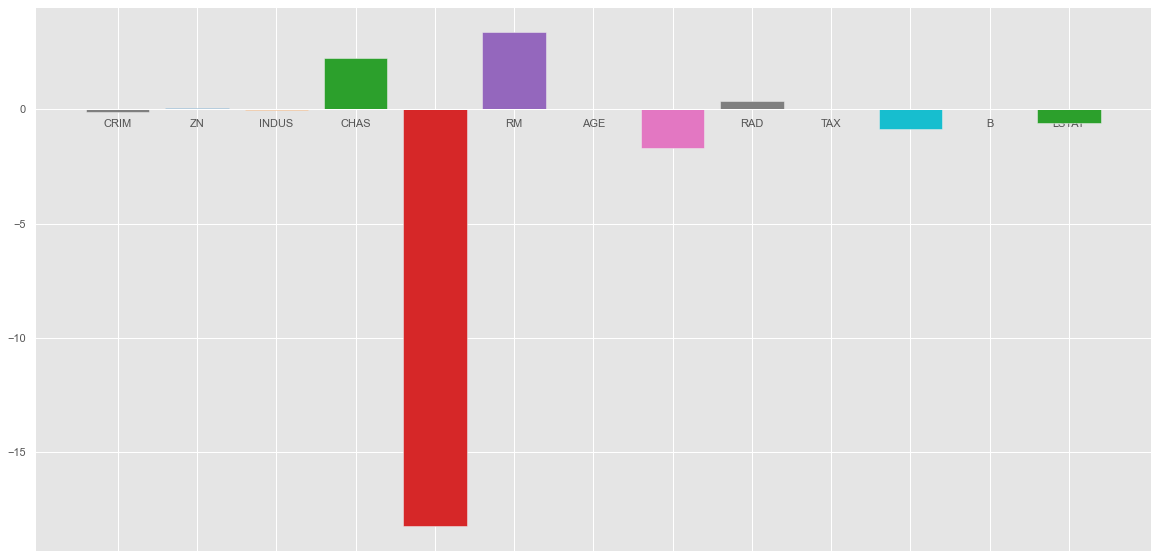

In [52]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green','tab:blue', 'tab:olive']

ax.bar(lreg_coefficient['Columns'],
lreg_coefficient['Coefficient Estimates'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

Now our motive is to reduce the coefficient score

#### Ridge Regression

In [49]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('Mean squared error on test set : ', mean_squared_error_ridge)

# get ridge coefficient and print
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = x_train.columns
ridge_coefficient['Coefficient Estimates'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared error on test set :  20.294171366295018
    Columns  Coefficient Estimates
0      CRIM              -0.099351
1        ZN               0.062625
2     INDUS              -0.088793
3      CHAS               2.093881
4       NOX              -9.707153
5        RM               3.432293
6       AGE               0.009165
7       DIS              -1.552355
8       RAD               0.326697
9       TAX              -0.013437
10  PTRATIO              -0.765542
11        B               0.008328
12    LSTAT              -0.607616


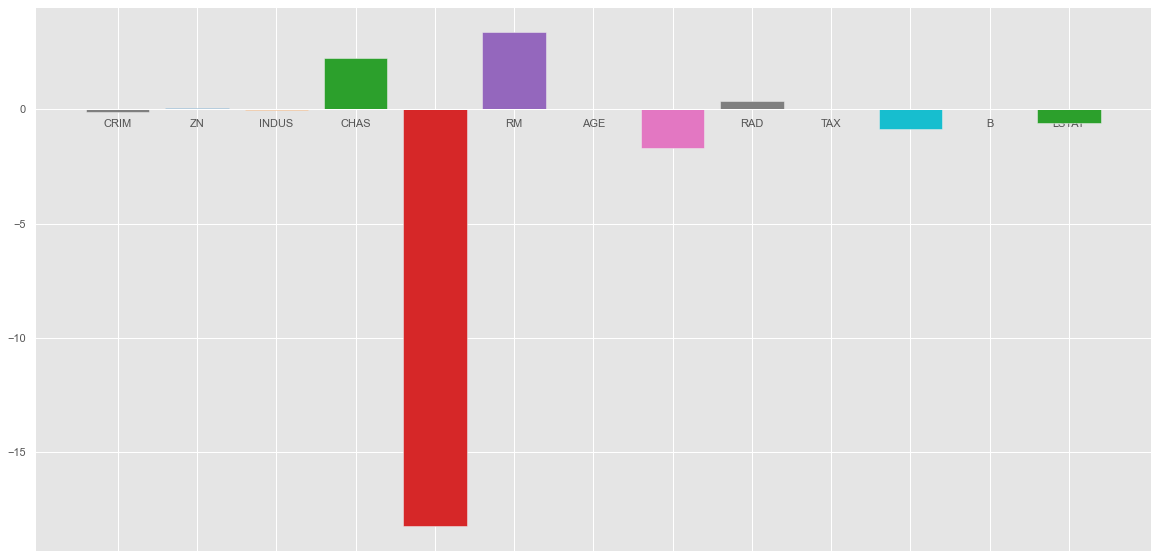

In [53]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green','tab:blue', 'tab:olive']

ax.bar(lreg_coefficient['Columns'],
lreg_coefficient['Coefficient Estimates'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

#### Lasso Regression

In [54]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print('Mean squared error on test set : ', mean_squared_error)

# get lasso coefficient and print
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = x_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set :  24.6012026642934
    Columns  Coefficient Estimates
0      CRIM              -0.051195
1        ZN               0.059491
2     INDUS              -0.068543
3      CHAS               0.000000
4       NOX              -0.000000
5        RM               0.824522
6       AGE               0.035012
7       DIS              -0.826230
8       RAD               0.280247
9       TAX              -0.014531
10  PTRATIO              -0.675340
11        B               0.007443
12    LSTAT              -0.822560
